In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fake_news_final.csv to fake_news_final (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Load dataset
df = pd.read_csv("fake_news_final.csv")

# Optional: Rename columns if needed (adjust based on actual column names)
# df.rename(columns={'title': 'News Headline', 'text': 'Complete News', 'label': 'Fake News(Yes/No)'}, inplace=True)

# Clean text columns (basic cleanup)
df['Complete News'] = df['Complete News'].astype(str).str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()

# Add text-based features
df['word_count'] = df['Complete News'].apply(lambda x: len(str(x).split()))
df['character_count'] = df['Complete News'].apply(lambda x: len(str(x).replace(" ", "")))

# 1. Fake vs Real News Count

<ipython-input-19-807f63f8b0e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fake News(Yes/No)', data=df, palette='Set1')


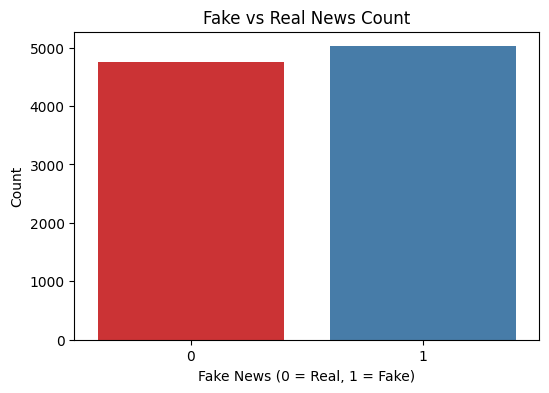

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Fake News(Yes/No)', data=df, palette='Set1')
plt.title("Fake vs Real News Count")
plt.xlabel("Fake News (0 = Real, 1 = Fake)")
plt.ylabel("Count")
plt.show()


## Word Count Distribution


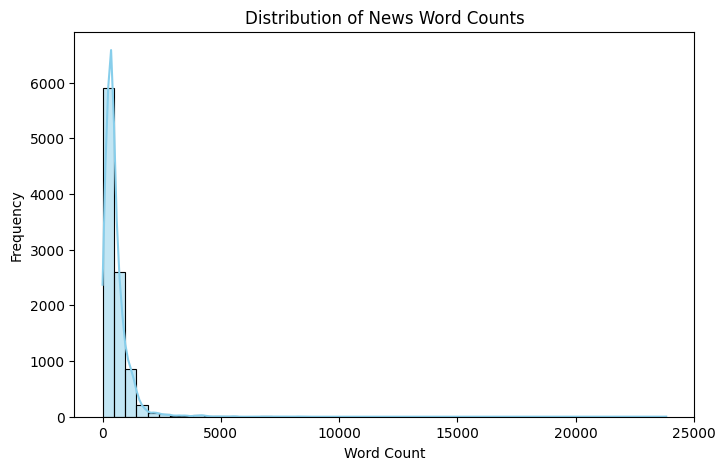

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of News Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


## **Character** **Count** **Distribution**

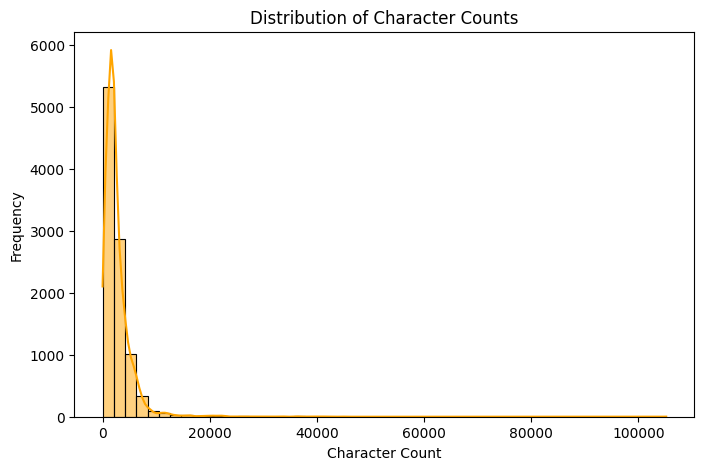

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['character_count'], bins=50, kde=True, color='orange')
plt.title("Distribution of Character Counts")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

## Word Count vs Character Count

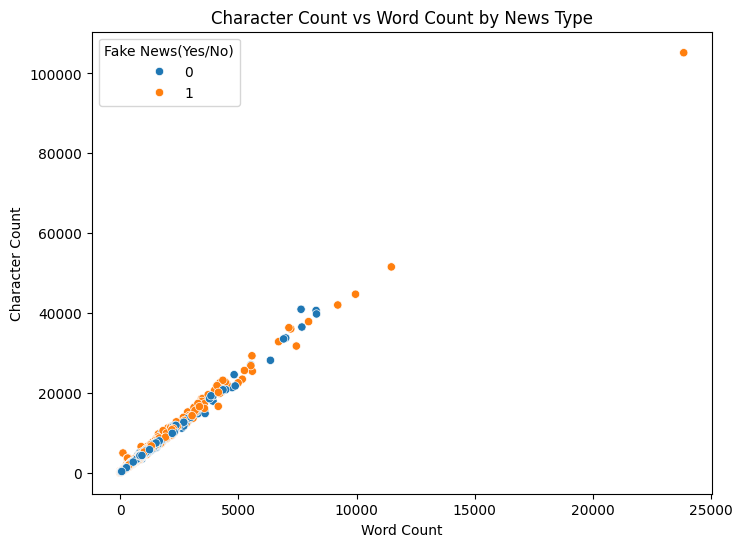

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='word_count', y='character_count', hue='Fake News(Yes/No)', data=df)
plt.title("Character Count vs Word Count by News Type")
plt.xlabel("Word Count")
plt.ylabel("Character Count")
plt.show()

## Word Cloud



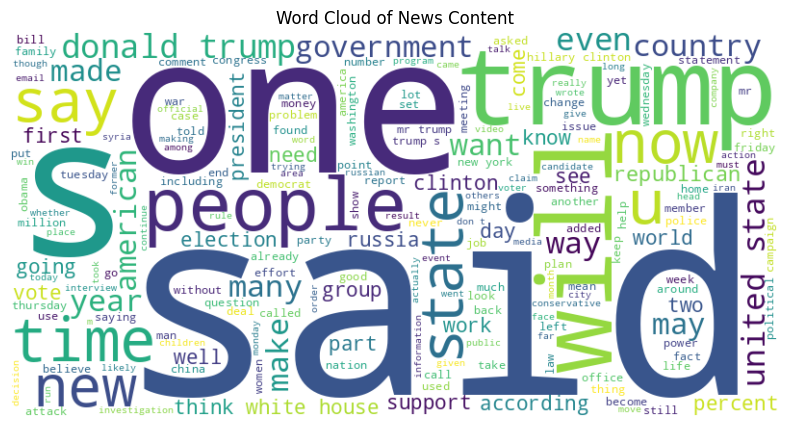

In [ ]:
text_combined = ' '.join(df['Complete News'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of News Content")
plt.show()

## News per Year if 'Publish Dates' is present

<ipython-input-24-43b8b651f5f9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='coolwarm')


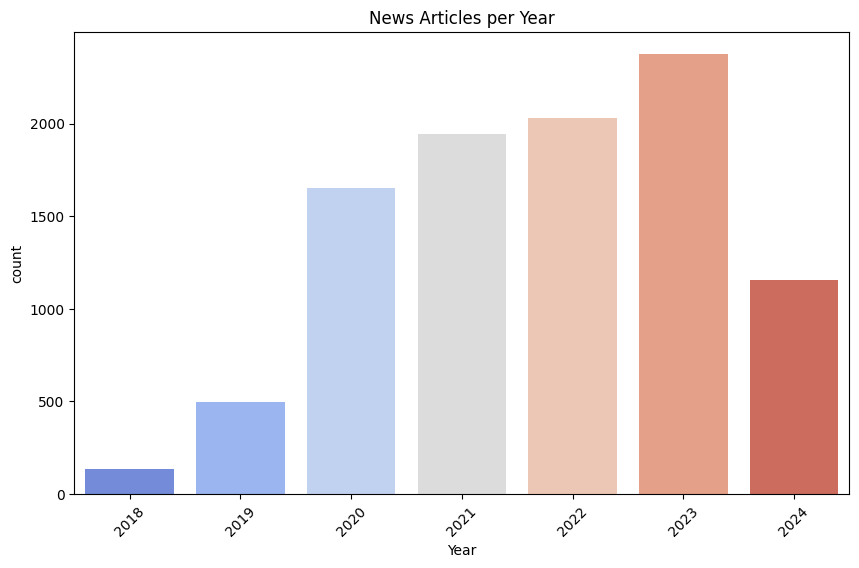

In [ ]:
if 'Publish Dates' in df.columns:
    df['Publish Dates'] = pd.to_datetime(df['Publish Dates'], errors='coerce')
    df['Year'] = df['Publish Dates'].dt.year
    plt.figure(figsize=(10,6))
    sns.countplot(x='Year', data=df, palette='coolwarm')
    plt.title("News Articles per Year")
    plt.xticks(rotation=45)
    plt.show()


## Month-wise Fake News Graph

<ipython-input-29-ab757f9d9125>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fake_by_month.index, y=fake_by_month.values, palette='Reds_r')


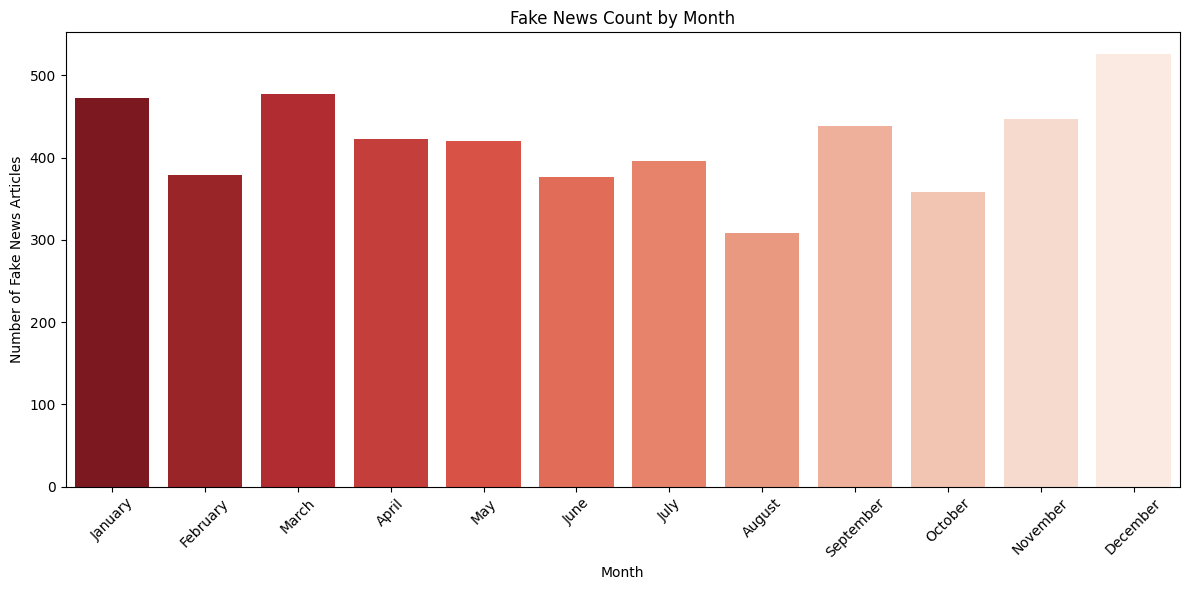

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("fake_news_final.csv")

# Convert 'Publish Dates' to datetime
df['Publish Dates'] = pd.to_datetime(df['Publish Dates'], errors='coerce')

# Extract month name
df['Month'] = df['Publish Dates'].dt.strftime('%B')  # Full month name
df['Month_Num'] = df['Publish Dates'].dt.month       # For sorting

# Filter only fake news
df_fake = df[df['Fake News(Yes/No)'] == 1]

# Group by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
fake_by_month = df_fake.groupby('Month').size().reindex(month_order).fillna(0)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=fake_by_month.index, y=fake_by_month.values, palette='Reds_r')
plt.title("Fake News Count by Month")
plt.xlabel("Month")
plt.ylabel("Number of Fake News Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
